In [1]:
from lr_steps import *

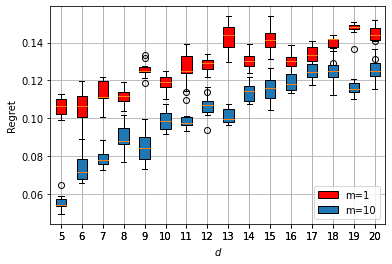

In [35]:
import pickle
f = open('regrets_tensor_b=100_d=20_r=3.p', 'rb')
d = pickle.load(f)
f.close()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1)

plt.grid()
plt.xlabel(r'$d$')
plt.ylabel('Regret')
bp1 = ax.boxplot(d[0].T, positions=range(5,21,1), patch_artist=True)
bp2 = ax.boxplot(d[3].T, positions=range(5,21,1), patch_artist=True)
for b in bp1['boxes']:
    b.set_facecolor('red')

ax.legend([bp1["boxes"][0], bp2["boxes"][0]], [f'm={1}', f'm={10}'], loc='lower right')

plt.show()

In [27]:
#ax2.legend([ax1["boxes"][0], ax2["boxes"][0]], ['A', 'B'], loc='upper right')


ax1['boxes'][0].legend('a')





AttributeError: 'PathPatch' object has no attribute 'legend'

In [ ]:
b = 6
d = 4
r = 2

In [3]:
x = np.random.randn(b, d, 1)
f = np.random.randn(d, 1)
R = np.random.randn(d, r) * 0
q = np.random.randn(r, 1)

In [4]:
t = f * 0
for x_i in x:
    e = np.exp(-f.T @ x_i)
    v = (e / ((1+e)**2)) * x_i.T @ (f - R @ q) *x_i
    t += v

print(t / b - f_grad_aux(x, q, R, f) )

[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [-2.77555756e-17]
 [-1.38777878e-17]]


In [5]:
t = q * 0
for x_i in x:
    t += ( (1/(1+(np.exp(-q.T @ R.T @ x_i))) ) - (1/(1+np.exp(-f.T @ x_i))) ) * R.T @ x_i

print(t / b - q_grad(x, q, R, f))

[[0.]
 [0.]]


In [6]:
t = R * 0
for x_i in x:
    t += ( -1/(1+np.exp(-f.T @ x_i)) + 1/(1+np.exp(-q.T @ R.T @ x_i))) * x_i @ q.T

print(t / b - R_grad(x, q, R, f))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [7]:
t1 = 0
t2 = 0

for x_i in x:
    p1 = 1 / (1 + np.exp(-f.T @ x_i))
    p2 = 1 / (1 + np.exp(-q.T @ R.T @ x_i))
    t1 += p1 * np.log(p1 / p2) + (1-p1) * np.log( (1-p1)/ (1-p2))

    a1 = 1 + np.exp(-f.T @ x_i)
    a2 = 1 + np.exp(-q.T @ R.T @ x_i)
    b1 = 1 + np.exp(f.T @ x_i)
    b2 = 1 + np.exp(q.T @ R.T @ x_i)
    t2 += (1/a1) * np.log(a2 / a1) + (1/b1) * np.log(b2 / b1)

print(t1 / b)
print(t2 / b)
print(loss(x, R, f, q).mean(axis=0))

[[0.21737698]]
[[0.21737698]]
[0.21737698]


In [8]:
min = 100
for i in range(1000):
    q = np.random.randn(r, 1)
    Q = np.zeros([1,1,r,1])
    Q[0,0]=q
    if regret(x=x, R=[R], p=np.ones(1), f=[f], o=np.ones(1), Q=Q) < min:
        min = regret(x=x, R=[R], p=np.ones(1), f=[f], o=np.ones(1), Q=Q)
print(min)

[[0.21737698]]


In [9]:
Q = find_Q(x=x, R=[R], f=[f], lr=1e-3, tol=1e-3)
print(regret(x=x, R=[R], p=np.ones(1), f=[f], o=np.ones(1), Q=Q))

[[0.21737698]]


In [23]:
for i in range(10):
    f = np.random.randn(d, 1)
    f = f / np.linalg.norm(f)
    Q = find_Q(x=x, R=[R], f=[f], lr=1e-3, tol=1e-3)
    print(regret(x=x, R=[R], p=np.ones(1), f=[f], o=np.ones(1), Q=Q))

[[0.14205246]]
[[0.08168862]]
[[0.04785205]]
[[0.04397419]]
[[0.06988889]]
[[0.12586373]]
[[0.15191263]]
[[0.041614]]
[[0.09913806]]
[[0.07158554]]


In [25]:
f = find_f(x=x, R=[R], p=np.ones(1), lr=1e-1, tol=1e-3)
print(f)
f = find_f(x=x, R=[R], p=np.ones(1), lr=1e-1, tol=1e-3)
print(f)
Q = find_Q(x=x, R=[R], f=[f], lr=1e-3, tol=1e-3)
print(regret(x=x, R=[R], p=np.ones(1), f=[f], o=np.ones(1), Q=Q))

100%|██████████| 1000/1000 [00:00<00:00, 26619.35it/s]


[[-0.55191521]
 [-0.09210097]
 [ 0.32635767]
 [ 0.76183836]]


100%|██████████| 1000/1000 [00:00<00:00, 26623.23it/s]

[[-0.55187787]
 [-0.09219228]
 [ 0.32653857]
 [ 0.76177684]]
[[0.17640355]]
